In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv
/kaggle/input/students/student_clustering.csv


In [16]:
import random
import numpy 
import pandas

In [17]:
class kmeans:
    def __init__(self, n_clusters=2, iterations=300):
        self.n_clusters = n_clusters
        self.iterations = iterations
        self.centroid = None
        self.inertia_ = None
        
    def fit_predict(self,X):
        self.centroid = X[random.sample(range(0, X.shape[0]),self.n_clusters)]
        
        for i in range(self.iterations):
            # assign clusters
            cluster_group = self.assign_cluster(X)
            old_centroids = self.centroid
            # move centroids
            self.centroid = self.move_centroids(X,cluster_group)
            # check finish
            if (old_centroids == self.centroid).all():
                break
        return cluster_group
    
    def assign_cluster(self,X):
        cluster_group = []
        distances = []
        
        for row in X:
            for centroid in self.centroid:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()
            
        return np.array(cluster_group)
    
    def move_centroids(self, X, cluster_group):
        new_centroids = []
        
        cluster_type = np.unique(cluster_group)
        
        for i in cluster_type:
            new_centroids.append(X[cluster_group == i].mean(axis = 0))
        
        ##
        cluster_type = np.unique(cluster_group)
        self.inertia_ = 0
        for cluster in cluster_type:
            c = self.centroid[cluster]
            for row in X[cluster_group == cluster]:
                self.inertia_ += np.sqrt(np.dot(row - c , row - c))
                
         
        ##
        return np.array(new_centroids)

In [18]:
# from kmeans import kmeans


df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

# km.n_clusters

In [19]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)

df_en = df_encoded.drop(columns = ['CustomerID'] , axis = 0)
df_main = pd.DataFrame(df_en).to_numpy()

In [20]:
df_encoded.isnull().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Gender_Female             0
Gender_Male               0
dtype: int64

In [21]:
# df1 = pd.read_csv("/kaggle/input/students/student_clustering.csv")

In [22]:
wcss = []

for i in range(1,21):
    km = kmeans(n_clusters=i, iterations=10000)
    km.fit_predict(df_main)
    wcss.append(km.inertia_)

In [23]:
wcss

[7118.477043022499,
 6046.657056210881,
 4805.419077929298,
 4096.796313968138,
 3676.1737402428134,
 3095.953080864472,
 2915.8345217133983,
 2834.4142634348373,
 2729.832861952662,
 2590.046684866118,
 2429.424157089029,
 2493.9853288639833,
 2563.5207562662913,
 2224.283227206223,
 2195.0707642639927,
 2173.885529574226,
 2191.788584790199,
 2011.1233027863934,
 2103.87400772757,
 1976.9427250393387]

In [24]:
import matplotlib.pyplot as plt

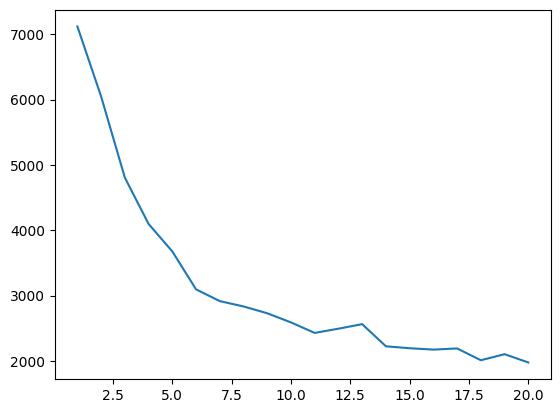

In [25]:
plt.plot(range(1,21) , wcss)

In [26]:
# df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

# X = df_en.iloc[:,:].values
X = df_main
km = kmeans(n_clusters=10, iterations=100000)
y_means = km.fit_predict(X)


In [27]:
y_means

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3, 4, 3, 2,
       0, 4, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 8, 6, 2, 8, 1, 6, 1, 8, 1, 8,
       2, 8, 5, 6, 1, 8, 5, 8, 1, 6, 2, 6, 5, 6, 1, 8, 1, 6, 1, 6, 1, 8,
       1, 6, 5, 8, 5, 8, 1, 6, 5, 6, 1, 8, 1, 6, 1, 8, 1, 8, 5, 6, 1, 6,
       1, 8, 1, 6, 7, 9, 7, 9, 7, 9, 7, 9, 7, 9, 7, 9, 7, 9, 7, 9, 7, 9,
       7, 9])